In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
#reading the prepared dataset for the machine learning model
df = pd.read_csv('Group_17_data_cleaned.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [54]:
df = df.dropna(axis=0)
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [55]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekend', 'Dummy_Monday', 'Dummy_Saturday', 'Dummy_Sunday',
       'Dummy_Thursday', 'Dummy_Tuesday', 'Dummy_Wednesday',
       'Dummy_Maximum_Load', 'Dummy_Medium_Load'],
      dtype='object')

In [56]:
!pip install -U mlxtend

!pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# using sklearn - Bidirectional 

# considering Usage_kWh as target variable

In [58]:
# convert date/time strings to timestamps
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']


In [59]:
# no features selected = 15

In [60]:
sffs = SFS(LinearRegression(),
         k_features=15,
         forward=True,
         floating=True,
         cv=0)

sffs.fit(X, y)
sffs.k_feature_names_

('date',
 'Lagging_Current_Reactive_Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2_tCO2',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'Dummy_Weekend',
 'Dummy_Monday',
 'Dummy_Saturday',
 'Dummy_Thursday',
 'Dummy_Tuesday',
 'Dummy_Wednesday',
 'Dummy_Maximum_Load',
 'Dummy_Medium_Load')

In [62]:
df_1 = df[['date',
 'Lagging_Current_Reactive_Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2_tCO2',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'Dummy_Weekend',
 'Dummy_Monday',
 'Dummy_Saturday',
 'Dummy_Thursday',
 'Dummy_Tuesday',
 'Dummy_Wednesday',
 'Dummy_Maximum_Load',
 'Dummy_Medium_Load']]
df_1['Usage_kWh'] = df['Usage_kWh'] # adding target variable to dataframe

<ipython-input-62-1a5260dd0096>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Usage_kWh'] = df['Usage_kWh'] # adding target variable to dataframe


In [63]:
df_1.head()

,date,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load,Usage_kWh
0,1514765700,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,3.17
1,1514766600,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,4.00
2,1514767500,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,3.24
3,1514768400,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,3.31
4,1514769300,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,3.82


In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# convert date/time strings to timestamps
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['date'] = df_1['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df_1.drop('Usage_kWh', axis=1)
y = df_1['Usage_kWh']

# scale the feature matrix
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y.values.reshape(-1, 1))

<ipython-input-64-544744b07bb9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])
<ipython-input-64-544744b07bb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = df_1['date'].astype('int64') // 10**9  # convert to seconds


In [65]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.34,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(11913, 15)
(11913, 1)
(11563, 15)
(11563, 1)
(11564, 15)
(11564, 1)


(None, None)

### Best model from part-2 

In [66]:
# Linear Regression came as best model in part-2

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
best_reg = LinearRegression(copy_X= True, fit_intercept= True)
best_reg.fit(X_train,y_train)

LinearRegression()

In [69]:
# model on validation dataset
# best model on validation data
y_valid_pred = best_reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.0032622001599279726
The mean absolute error is 0.03710563119576215
The root mean sqaured error is 0.05711567350498436
The regression score is 0.9229123256135742


In [70]:
# model on test dataset
y_test_pred = best_reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.003087430310023372
The mean absolute error is 0.036790055133531306
The root mean sqaured error is 0.055564649823636715
The regression score is 0.9268589881197077


### Best model from part-3 

In [71]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [72]:
best_svm = SVR(kernel="linear",C=1000,gamma=1)
best_svm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=1, kernel='linear')

In [73]:
# model on validation dataset

y_valid_pred = best_svm.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.0046303329279473076
The mean absolute error is 0.05685064932534702
The root mean sqaured error is 0.06804654971376072
The regression score is 0.9101306092305295


In [74]:
# model on test dataset
y_test_pred = best_svm.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")


The mean squared error is 0.004515405944678258
The mean absolute error is 0.0565556736831406
The root mean sqaured error is 0.06719677034410403
The regression score is 0.9118608791085631


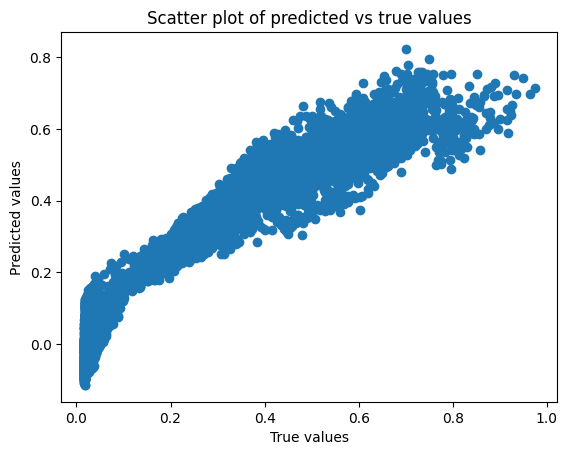

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# scatter plot of predicted vs true values
y_pred = best_svm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of predicted vs true values")
plt.show()